<center><img SRC="IBM-logo.jpg" align="center"/></center>
<center><h1 style="color:#008080">IBM HR Analytics</h1></center>
<center><h2 style="color:#00008B">Desercion y desempeño de los recursos</h2></center>

<p style="text-align:justify">Por qué los recursos renuncian?</p> 

<ul>
    <li>Los empleados son la columna vertebral de la organización. El desempeño de la organización se basa en gran medida en la calidad de los empleados. Los desafíos que una organización debe enfrentar son los siguientes:</li>
</ul>

<ol>
    <li>Costos en términos de dinero y tiempo para capacitar a nuevos empleados. </li>
    <li>Pérdida de empleados con experiencia</li>
    <li>Impacto en la productividad</li>
   
</ol>

<h3 style= "color: #00008B">1. Objetivos del estudio </p>
<ol>
    <li> Explorar las diferentes variables y encontrar las relaciones con el motivo de deserción  </li>
    <li> Determinar qué  factores están contribuyendo más a la deserción de los empleados</li>
</ol>   

In [18]:
import pandas as pd              
import numpy as np               
import matplotlib as mpl         
import matplotlib.pyplot as plt  

In [19]:
#Carga de datos
dfIBM1 = pd.read_csv ("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [20]:
dfIBM1.shape

(1470, 35)

In [21]:
dfIBM1.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [22]:
dfIBM1.tail(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [23]:
dfIBM1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [24]:
dfIBM1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<h3 style= "color: #00008B">2. Visualizacion de datos </p>

In [31]:
import matplotlib.pyplot as plt

In [94]:
gf1 = dfIBM1.groupby (['Attrition']).count()
gf1 = gf1.iloc[:,:1]
gf1

,Age
Attrition,
0,1233
1,237


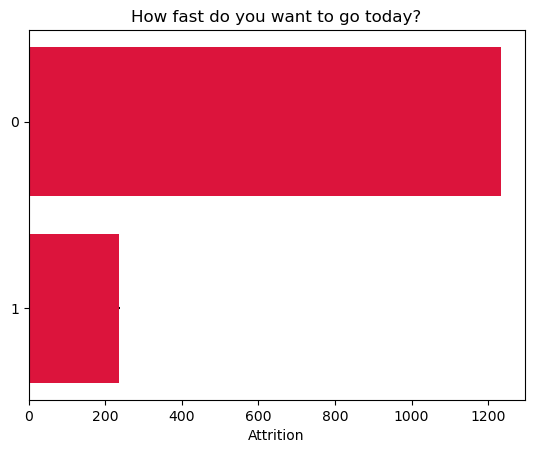

In [99]:
plt.rcdefaults()
fig, ax = plt.subplots()

gf11 = ['0', '1']
y_pos = np.arange(len(gf11))
lct1 = gf1['Age'].tolist ()
error = np.random.rand(len(gf11))

ax.barh(y_pos, lct1, xerr=error, align='center', color = "#DC143C")
ax.set_yticks(y_pos)
ax.set_yticklabels(gf11)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Attrition')
ax.set_title('How fast do you want to go today?')

plt.show()

In [30]:
gf1 = dfIBM1.groupby (['EnvironmentSatisfaction']).count()
gf1 = gf1.iloc[:,:1]
gf1

,Age
EnvironmentSatisfaction,
1,264
2,272
3,432
4,415


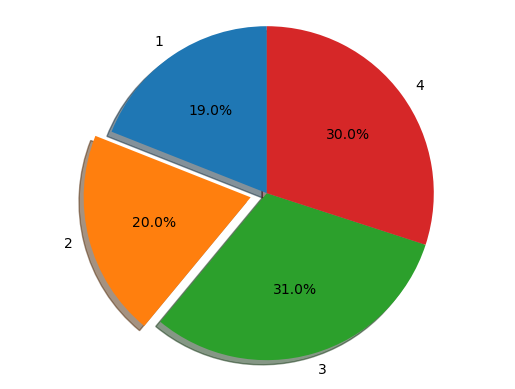

In [34]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '1', '2', '3','4'
#sizes = [19, 20, 31,30]
#explode = (0, 0.1, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

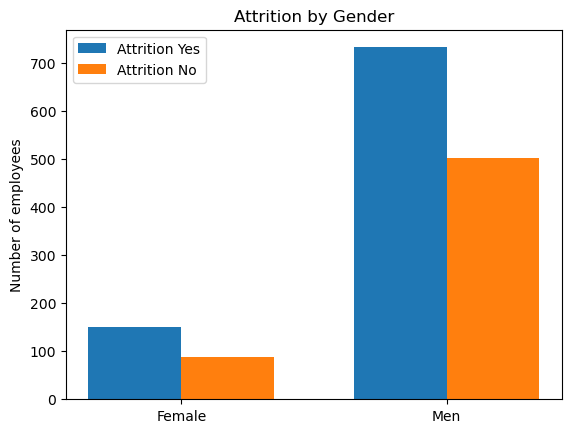

In [82]:
labels = ['Female', 'Men']
AttritionYes_means = [87, 150]
AttritionNo_means = [501, 732]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Attrition Yes')
rects2 = ax.bar(x + width/2, women_means, width, label='Attrition No')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of employees')
ax.set_title('Attrition by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

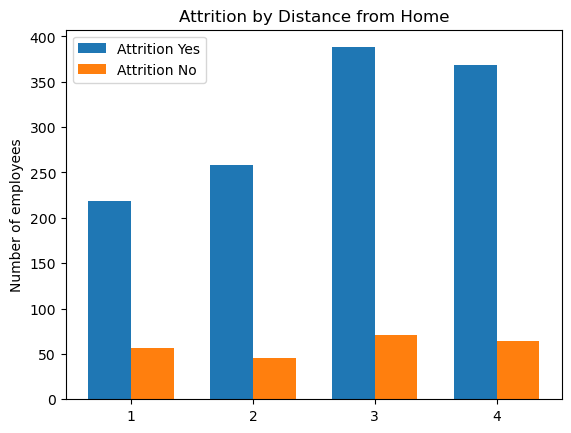

In [84]:
labels = ['1', '2', '3', '4']
AttritionYes_means = [219, 258, 388, 368]
AttritionNo_means = [57, 45, 71, 64]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, AttritionYes_means, width, label='Attrition Yes')
rects2 = ax.bar(x + width/2, AttritionNo_means, width, label='Attrition No')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of employees')
ax.set_title('Attrition by Distance from Home')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

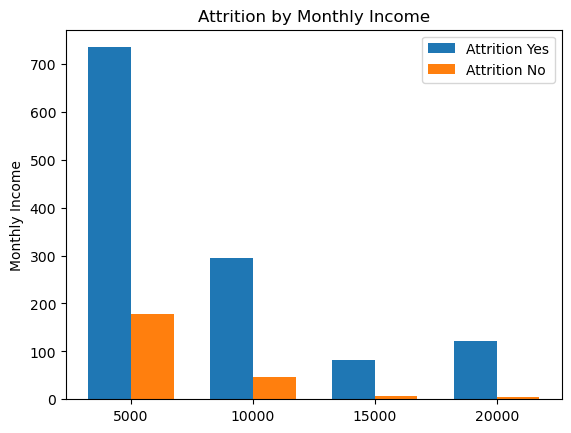

In [86]:
labels = ['5000', '10000', '15000', '20000']
AttritionYes_means = [735, 295, 82, 121]
AttritionNo_means = [179, 46, 7, 5]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, AttritionYes_means, width, label='Attrition Yes')
rects2 = ax.bar(x + width/2, AttritionNo_means, width, label='Attrition No')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Monthly Income')
ax.set_title('Attrition by Monthly Income')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

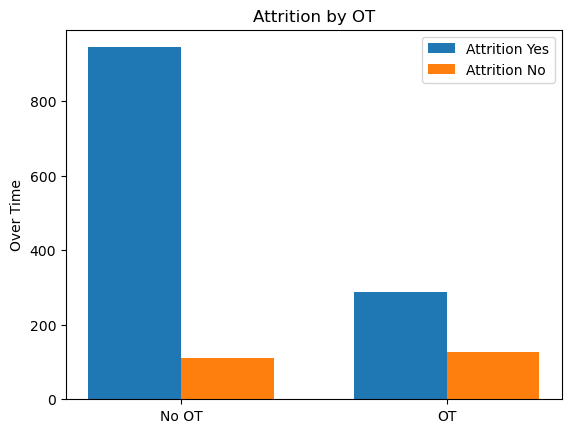

In [89]:
labels = ['No OT', 'OT']
AttritionYes_means = [944, 289]
AttritionNo_means = [110, 127]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, AttritionYes_means, width, label='Attrition Yes')
rects2 = ax.bar(x + width/2, AttritionNo_means, width, label='Attrition No')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Over Time')
ax.set_title('Attrition by OT')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

<h3 style= "color: #00008B">3. Conclusiones </p>

<ul>
    <li>Género: los hombres tienen más probabilidades de renunciar.</li>
    <li>Distancia del trabajo: los trabajadores que viajan mucho tienen más probabilidades de renunciar que otros empleados.</li>
    <li>Los trabajadores con ingresos mensuales bajos tienen más probabilidades de renunciar a sus trabajos.</li>
    <li>Tiempo extra: Es probable que los trabajadores que trabajan tiempo extra renuncien más  que los demás.</li>
</ul>